***

# Thompson Sampling

## Thompson Sampling

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import beta

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Ads_CTR_Optimisation_2arm.csv')

In [3]:
df 

,Ad 1,Ad 2
0,1,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
9995,0,1
9996,0,0
9997,0,0
9998,0,1


총 2개의 광고에 대해, 10000번의 시행 데이터가 주어짐. 

In [4]:
data = np.array(df)

reward 저장
성공, 실패 parameter 
각 시행에 대해 어떻게 바뀌는지 확인이 필요

In [5]:
ads = list(range(2))
n_k = len(ads)
thetas = np.zeros(n_k)

In [6]:
#초기 분포 지정
#beta distribution의 파라미터 a, b를 지정
#이때 직관적으로 a는 광고가 클릭되는 정도를, b는 클릭되지 않는 정도를 대변
#reward를 아무런 가중치 없이 단순 클릭 여부로 설정하는 경우,
#선정된 광고가 클릭되었으면 a에 1을 더해주고 그렇지 않은 경우 b에 1을 더해줌. 
a = np.ones(n_k)
b = np.ones(n_k)

In [7]:
#결과를 저장할 리스트 생성
total_reward = []
total_regret = []
check_a = []
check_b = []
for k in range(n_k):
    _a = [1]
    _b = [1]
    check_a.append(_a)
    check_b.append(_b)

In [8]:
_a

[1]

In [9]:
_total_reward = 0
_total_regret = 0

In [10]:
for i in range(len(df)):
    for k in range(n_k):
        thetas[k] = np.random.beta(a[k] , b[k])
    slcted_ads = np.argmax(thetas)
    
    if data[i , slcted_ads] == 1:
        reward = 1
    else:
        reward = 0
    _total_reward = _total_reward + reward
    total_reward.append(_total_reward)

    a[slcted_ads] = a[slcted_ads] + reward
    b[slcted_ads] = b[slcted_ads] + (1 - reward)
    
    check = [4, 9, 49, 99, 199, 299, 499, 999, 4999, 9999]
    if i in check:
        for k in range(n_k):
            _a = a[k]
            _b = b[k]
            check_a[k].append(_a)
            check_b[k].append(_b)

***

### 결과 확인

In [11]:
_check = [0]
for i in range(len(check)):
    _check.append(check[i])
check = _check

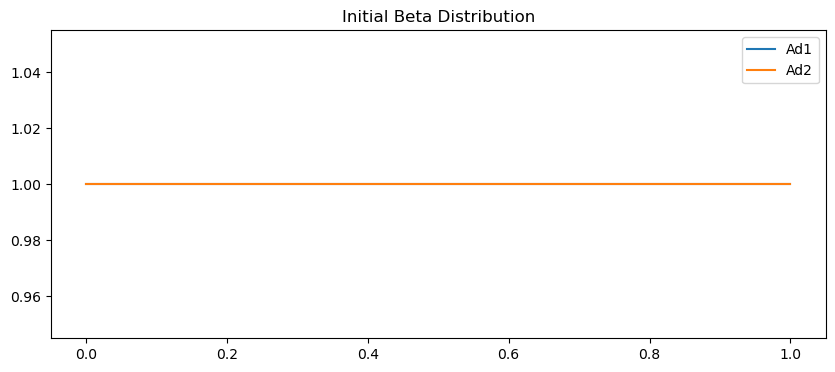

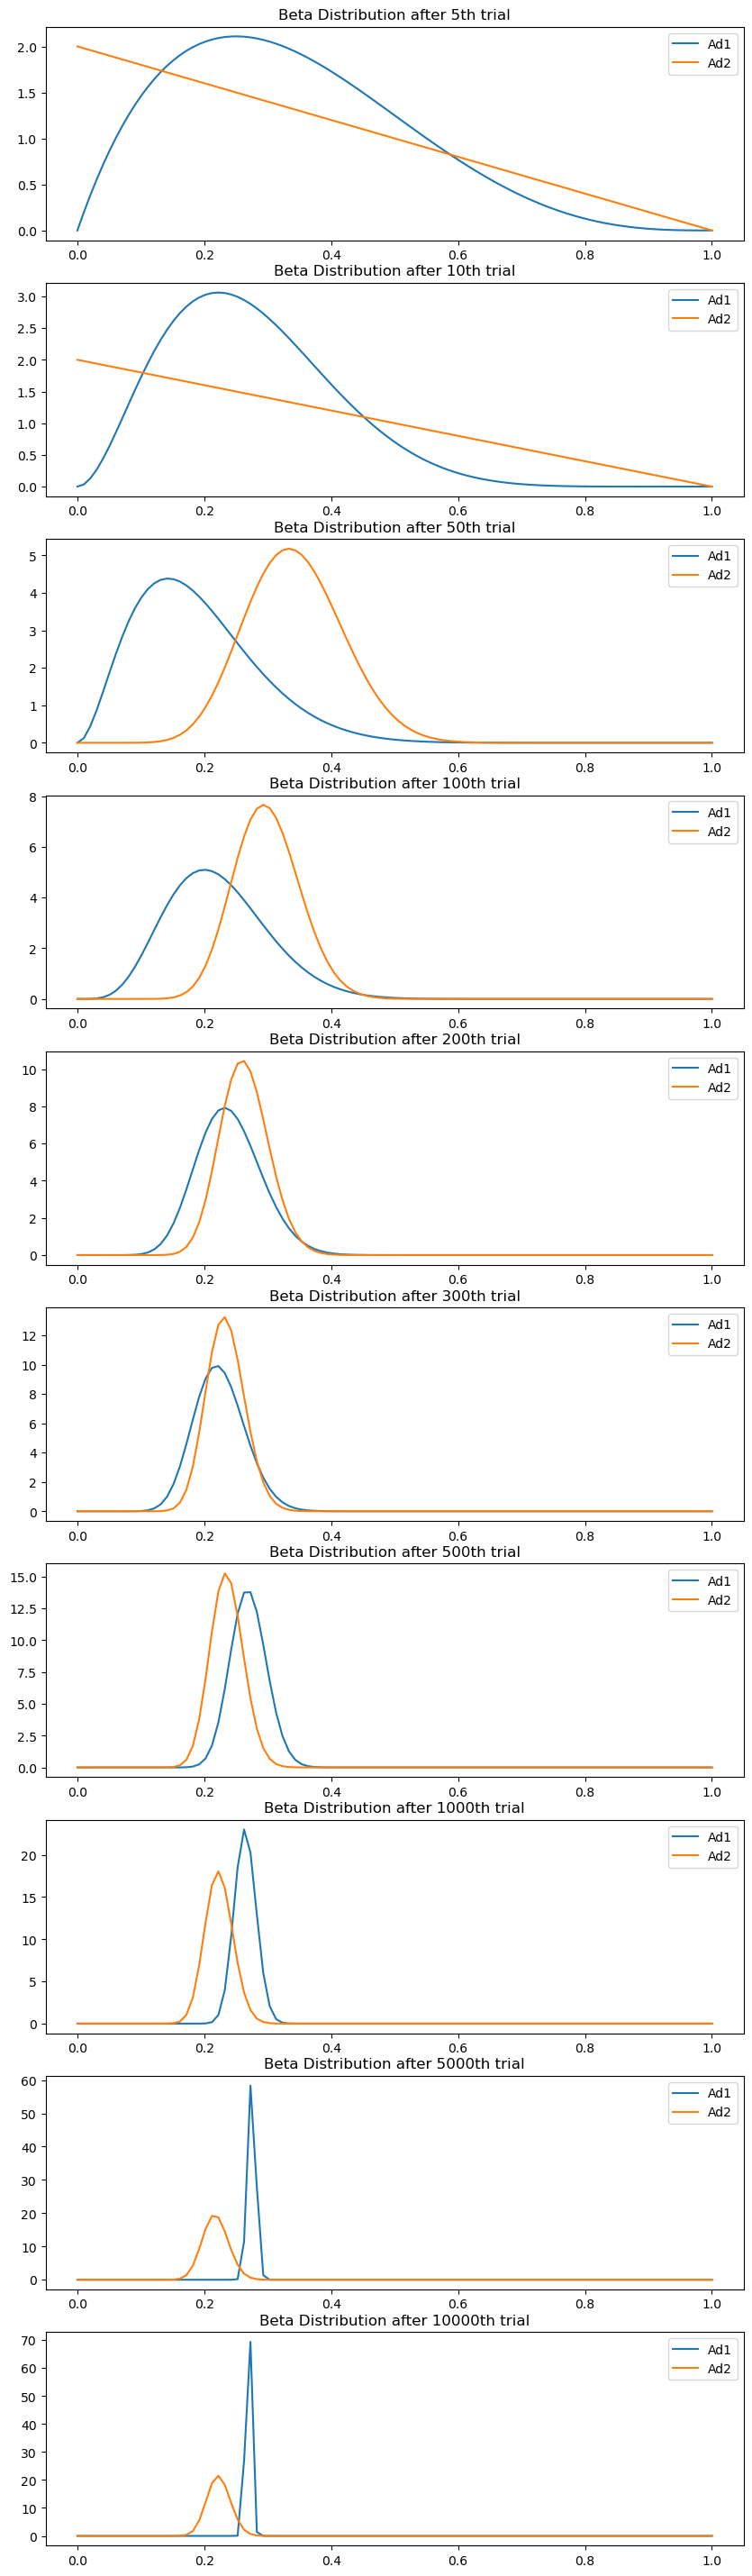

In [12]:
plt.figure(figsize = (10, 4))
x = np.linspace(0, 1, 100)
for k in range(n_k):
    fx = beta.pdf(x , check_a[k][0] , check_b[k][0])
    plt.plot(x, fx, label = "Ad{}".format(k+1))
plt.legend()
plt.title("Initial Beta Distribution")
plt.show()
plt.figure(figsize = (10, 40))
for c in range(1, len(check)):
    subplot = plt.subplot(len(check) , 1 , c+1)
    for k in range(n_k):
        fx = beta.pdf(x, check_a[k][c] , check_b[k][c])
        plt.plot(x, fx , label = "Ad{}".format(k+1))
    plt.title("Beta Distribution after {}th trial".format(check[c]+1))
    plt.legend()
plt.show()

In [13]:
#CTR(Click Through Rate) 계산
#이후 regret을 구하는 데에 이용할 것.
CTR_list = list(df.mean())
CTR_list

[0.2695, 0.2091]

In [14]:
thetas

array([0.26564393, 0.2294746 ])